## Using Machine Learnin and Natural Language Tutorial

We are using the Tutorial from [here](https://www.theaidream.com/post/demystify-dna-sequencing-with-machine-learning-and-python)

Use case: Build a classification model that is trained on the human DNA sequence and can predict a gene family based on the DNA sequence of the coding sequence. To test the model, we will use the DNA sequence of humans, dogs, and chimpanzees and compare the accuracies.

Gene families are groups of related genes that share a common ancestor. Members of gene families may be paralogs or orthologs. Gene paralogs are genes with similar sequences from within the same species while gene orthologs are genes with similar sequences in different species.

The dataset contains human DNA sequence, Dog DNA sequence, and Chimpanzee DNA sequence.


## First, Let's make some imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Then we can download the data

In [3]:
human_url = 'https://raw.githubusercontent.com/nageshsinghc4/DNA-Sequence-Machine-learning/master/human_data.txt'
chimp_url = 'https://raw.githubusercontent.com/nageshsinghc4/DNA-Sequence-Machine-learning/master/chimp_data.txt'
dog_url = 'https://raw.githubusercontent.com/nageshsinghc4/DNA-Sequence-Machine-learning/master/dog_data.txt'


human_dna = pd.read_table(human_url)
chimp_dna = pd.read_table(chimp_url)
dog_dna = pd.read_table(dog_url)


human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


The class refers to 

![](https://static.wixstatic.com/media/3eee0b_06abe8649116492ea56ad4a64017260c~mv2.png/v1/fit/w_300,h_300,al_c,q_5/file.png)

In [4]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#convert our training data sequences into short overlapping k-mers of length 6. Lets do that for each species of data we have using our Kmers_funct function.
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)
chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)
dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

### Counts Plot

<AxesSubplot:>

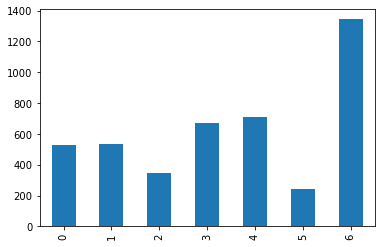

In [47]:
human_dna['class'].value_counts().sort_index().plot.bar()

chimp_dna['class'].value_counts().sort_index().plot.bar()

dog_dna['class'].value_counts().sort_index().plot.bar()

In [48]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


We need to now convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. We will make a target variable y to hold the class labels.

Let's do the same for chimp and dog. 

In [9]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

#Now let's do the same for chimp and dog.
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

Convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

In [13]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X_hum = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

Let us have a look at the output;

In [14]:
print(X_hum.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


### Build a multinomial naive Bayes classifier

Let's use the human data to train the model, holding out 20% of the human data to test the model. Then we can challenge the model’s generalizability by trying to predict sequence function in other species (the chimpanzee and dog).

We split the data into train/test split human dataset and build simple multinomial naive Bayes classifier.

For better models, you'll have to do parameter tuning and build a model with different ngram sizes. Let's first test out ngram size of 4 and a model alpha of 0.1.



In [15]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hum,
                                                   y_human,
                                                   test_size = 0.20,
                                                   random_state=42)
                                                   
### Multinomial Naive Bayes Classifier ###
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion matrix for predictions on human test DNA sequence\n")

print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
   
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [18]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = classifier.predict(X_chimp)

In [19]:
# performance on chimpanzee genes
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


#### Dog
Now Let's have a look at the Dog sequences. 

In [32]:
pd.DataFrame(X_dog)

,0
0,"(0, 250)\t1\n (0, 256)\t1\n (0, 340)\t1\n ..."
1,"(0, 256)\t1\n (0, 317)\t1\n (0, 653)\t1\n ..."
2,"(0, 1082)\t1\n (0, 2790)\t1\n (0, 4200)\t1..."
3,"(0, 904)\t1\n (0, 1122)\t1\n (0, 1314)\t1\..."
4,"(0, 193)\t1\n (0, 764)\t1\n (0, 1122)\t1\n..."
...,...
815,"(0, 678)\t1\n (0, 1150)\t1\n (0, 1175)\t1\..."
816,"(0, 21)\t1\n (0, 82)\t1\n (0, 131)\t1\n (..."
817,"(0, 8)\t1\n (0, 34)\t1\n (0, 79)\t1\n (0,..."
818,"(0, 291)\t1\n (0, 1144)\t1\n (0, 1324)\t1\..."


In [20]:
y_pred_dog = classifier.predict(X_dog)

In [21]:
# performance on dog genes
print("Confusion matrix for predictions on Dog test DNA sequence\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


The model seems to produce good results on human data. It also does on Chimpanzee which is because the Chimpanzee and humans share the same genetic hierarchy. The performance of the dog is not quite as good which is because the dog is more diverging from humans than the chimpanzee.

#### Model generalization 
We can see the model performs consistently well. Although the accuracy may not be that high. Note that these may not be the best performance measures, but they do give a good idea. 

Recall our lecture on model perfomance? What do you think we can use to improve on model performance?

<br>

<AxesSubplot:>

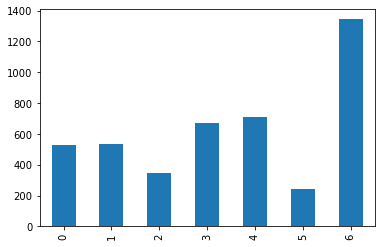

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Accuracy metrics
from sklearn.metrics import accuracy_score, classification_report, auc

from sklearn import feature_selection

#from sklearn.externals import joblib

#from xgboost import XGBClassifier

#import xgboost as xgb

def train_sgd(feature_frame, feature_frame_p, y_train, y_test):
    scaler = MinMaxScaler()
    #Scale the train data
    scaler.fit(feature_frame) 
    X_train = scaler.transform(feature_frame)

    #Scale the test data as well
    scaler.fit(feature_frame_p)
    X_test = scaler.transform(feature_frame_p)
    
    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    pred_sgd = clf.predict(X_test)
    
    return roc_auc_score(y_test, pred_sgd)

def train_svm(feature_frame, feature_frame_p, y_train, y_test):
    scaler = MinMaxScaler()
    #Scale the train data
    scaler.fit(feature_frame) 
    X_train = scaler.transform(feature_frame)

    #Scale the test data as well
    scaler.fit(feature_frame_p)
    X_test = scaler.transform(feature_frame_p)
    
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    pred_svm = clf.predict(X_test)
    
    return roc_auc_score(y_test, pred_svm)

def train_xgb(feature_frame,feature_frame_p,y_train, y_test):
    
    xgdmat = xgb.DMatrix(feature_frame, y_train) 
    our_params = {'eta': 0.3, 'seed':0, 'subsample': 1, 'colsample_bytree': 1, 
                 'objective': 'binary:logistic', 'max_depth':6, 'min_child_weight':1} 
    my_model = xgb.train(our_params,xgdmat)
    testdmat = xgb.DMatrix(feature_frame_p, y_test)
    y_pred = my_model.predict(testdmat)
    
    return roc_auc_score(y_test, y_pred)

def train_gradient(feature_frame,feature_frame_p,y_train, y_test):
    clf = GradientBoostingClassifier()
    clf.fit(feature_frame, y_train)
    pred_sgd = clf.predict(feature_frame_p)

    return roc_auc_score(y_test, pred_sgd)

In [33]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [34]:
url ="http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/nci.data"

In [38]:
labels = ["CNS","CNS","CNS","RENAL","BREAST","CNS","CNS","BREAST","NSCLC",
          "NSCLC","RENAL","RENAL","RENAL","RENAL","RENAL","RENAL","RENAL",
          "BREAST","NSCLC","RENAL","UNKNOWN","OVARIAN","MELANOMA","PROSTATE",
          "OVARIAN","OVARIAN","OVARIAN","OVARIAN","OVARIAN","PROSTATE","NSCLC",
          "NSCLC","NSCLC","LEUKEMIA","K562B-repro","K562A-repro","LEUKEMIA",
          "LEUKEMIA","LEUKEMIA","LEUKEMIA","LEUKEMIA","COLON","COLON","COLON",
          "COLON","COLON","COLON","COLON","MCF7A-repro","BREAST","MCF7D-repro",
          "BREAST","NSCLC","NSCLC","NSCLC","MELANOMA","BREAST","BREAST","MELANOMA",
          "MELANOMA","MELANOMA","MELANOMA","MELANOMA","MELANOMA"]

In [42]:
len(labels)

64

In [40]:
ma =pd.read_csv(url, delimiter="\s*", engine="python")